<a href="https://colab.research.google.com/github/hockeyguy123/BioE-245-HW3/blob/main/BioE_245_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Brain MRI Classification & Segmentation

> Code to help you work through the homework. You are welcome to use this template or branch off on your own.



## Loading Kaggle Dataset
We can download the Brain MRI Segmentation dataset from Kaggle:
https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation

In [ ]:
!curl -L -o lgg-mri-segmentation.zip https://www.kaggle.com/api/v1/datasets/download/mateuszbuda/lgg-mri-segmentation
!unzip -qo lgg-mri-segmentation.zip "lgg-mri-segmentation/kaggle_3m/*"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  713M  100  713M    0     0   172M      0  0:00:04  0:00:04 --:--:--  196M


In [ ]:
import os
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

import torch
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

##Visualization
Let's write code that will allow us to read and display the .tiff files

In [ ]:
def image_file_to_arr(filename: str) -> np.ndarray:
  """
  Reads a .tiff file and returns a numpy array.
  """
  # CODE
  return np.zeros((256, 256, 3))

In [ ]:
def mask_file_to_arr(filename: str) -> np.ndarray:
  """
  Reads a .tiff file and returns a numpy array.
  """
  # CODE
  return np.zeros((256, 256))

In [ ]:
def plot_subject_data(img: np.ndarray, gt_seg: np.ndarray = None, pred_seg: np.ndarray = None):
  """
  Plots a three-channel image. Optional parameters for ground truth and predicted segmentation.
  Draw contours around the segmentation masks.
  """
  fig, ax = plt.subplots(1, 3, figsize=(12, 4))
  # CODE
  plt.tight_layout()
  plt.show()

Let's try to display one of the subjects in the dataset

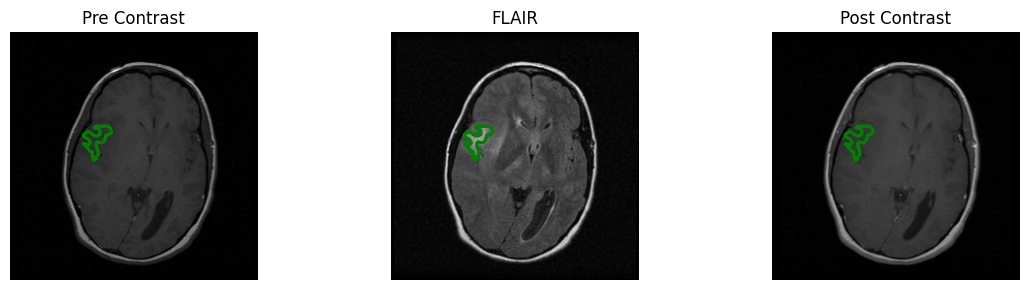

In [ ]:
subject_img = image_file_to_arr("/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_23.tif")
mask_img = mask_file_to_arr("lgg-mri-segmentation/kaggle_3m/TCGA_DU_6408_19860521/TCGA_DU_6408_19860521_23_mask.tif")
plot_subject_data(subject_img, mask_img)

## Split our dataset
Let's split our dataset into training, validation, and test sets (70% - 10% - 20%)

In [ ]:
def get_subjects(datapath: str) -> list[str]:
  """
  Returns a list of subjects in the dataset.
  """
  # CODE
  return []

In [ ]:
def train_val_test_split(subjects: List[str]) -> Tuple[List[str], List[str], List[str]]:
  """
  Returns three lists of subjects for training, validation, and test sets.
  """
  # CODE
  return [], [], []

In [ ]:
random.seed(42)
train_subjects, val_subjects, test_subjects = train_val_test_split(get_subjects("lgg-mri-segmentation/kaggle_3m"))
print(f"Train subjects: {len(train_subjects)}")
print(f"Validation subjects: {len(val_subjects)}")
print(f"Test subjects: {len(test_subjects)}")
print(test_subjects)

Train subjects: 77
Validation subjects: 11
Test subjects: 22
['TCGA_FG_6691_20020405', 'TCGA_HT_7680_19970202', 'TCGA_HT_7475_19970918', 'TCGA_HT_8107_19980708', 'TCGA_HT_8563_19981209', 'TCGA_HT_A5RC_19990831', 'TCGA_HT_7879_19981009', 'TCGA_DU_A5TY_19970709', 'TCGA_FG_A4MU_20030903', 'TCGA_DU_8162_19961029', 'TCGA_DU_8166_19970322', 'TCGA_HT_7690_19960312', 'TCGA_HT_7684_19950816', 'TCGA_HT_8018_19970411', 'TCGA_FG_5964_20010511', 'TCGA_DU_6400_19830518', 'TCGA_CS_4941_19960909', 'TCGA_DU_A5TU_19980312', 'TCGA_DU_8167_19970402', 'TCGA_CS_5397_20010315', 'TCGA_HT_8111_19980330', 'TCGA_HT_7856_19950831']


## Pytorch Dataset
Let's start writing code to load our data for training

Let's write some basic utilities to get the files for the subjects and the data from those files

In [ ]:
def get_files(datapath: str, subjects: List[str]) -> Tuple[List[str], List[str]]:
  """
  Returns a list of image files and a list of mask files for the given subjects.
  Make sure your image and mask files correspond to the same subject and slice.
  """
  img_files = []
  mask_files = []
  for subject in subjects:
    pass
    # CODE
  return img_files, mask_files

In [ ]:
print(train_subjects[0])
test_img_files, test_mask_files = get_files("lgg-mri-segmentation/kaggle_3m", [train_subjects[0]])
print(test_img_files)
print(test_mask_files)

TCGA_DU_5854_19951104
['lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_25.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_18.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_10.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_14.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_22.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_27.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_3.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_23.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_21.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_6.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854_19951104/TCGA_DU_5854_19951104_11.tif', 'lgg-mri-segmentation/kaggle_3m/TCGA_DU_5854

In [ ]:
def get_img_data(file: str) -> np.ndarray:
  """
  Returns a numpy array for the given image file.
  Output should be [3, H, W]
  """
  # CODE
  return np.zeros((3, 256, 256))

In [ ]:
def get_mask_data(file: str) -> np.ndarray:
  """
  Returns a numpy array for the given mask file.
  Output should be [1, H, W]
  """
  # CODE
  return np.zeros((1, 256, 256))

## Data Normalization
We need to normalize our data. One way is to subtract the mean and divide by the standard deviation. Here we find the per-channel global mean and standard deviation for our training dataset. We will also apply this normalization to the validation and testing datasets.

In [ ]:
# Get train img files
train_img_files = []
# Get the train images
train_imgs = []
# Compute their mean and std. dev.
IMAGE_MEAN = 0.0
IMAGE_STD = 1.0
print(IMAGE_MEAN)
print(IMAGE_STD)

[21.20790144 20.69876784 21.21713765]
[32.22823686 30.96703272 31.76673512]


# Custom transforms
Write our own custom transform classes

In [ ]:
class RandFlip():
  def __init__(self, p: float = 0.5):
    self.p = p

  def forward(self, img: np.ndarray, mask: np.ndarray = None) -> Tuple[np.ndarray, np.ndarray]:
    """
    Flips the image and the mask.
    Make two random flips: horizontal and vertical
    """
    if mask is None:
      # Flip image
      return img, None
    else:
      # Flip image and mask
      return img, mask

In [ ]:
class RandRotate():
  def __init__(self):
    pass
  def forward(self, img: np.ndarray, mask: np.ndarray = None) -> Tuple[np.ndarray, np.ndarray]:
    """
    Rotates the image and the mask.
    """
    num_rot = random.randint(0, 3)
    if mask is None:
      # Rotate Image
      return img, None
    else:
      # Rotate Image and Mask
      return img, mask

In [ ]:
class Normalize():
  def __init__(self, image_mean: np.ndarray, image_std: np.ndarray):
    self.image_mean = image_mean
    self.image_std = image_std

  def forward(self, img: np.ndarray, mask: np.ndarray = None) -> Tuple[np.ndarray, np.ndarray]:
    """
    Normalizes the image.
    """
    # Normalize Image
    if mask is None:
      return img, None
    else:
      # Normalize Mask
      return img, mask


In [ ]:
class Compose():
  def __init__(self, transforms: List):
    self.transforms = transforms

  def forward(self, img: np.ndarray, mask: np.ndarray = None) -> Tuple[np.ndarray, np.ndarray]:
    """
    Applies the transforms to the image and the mask.
    """
    # Apply transforms
    return img, mask

## Pytorch Dataset
Make a pytorch dataset for classification

In [ ]:
class TumorClassification(Dataset):
    def __init__(self, img_dir: str, subjects: List[str], transform=None):
      """
      img_dir: directory containing the images
      subjects: list of subjects to use
      transform: transform to apply to the images
      Precompute the labels, but load the images dynamically
      """
      self.img_dir = img_dir
      self.subjects = subjects
      self.transform = transform
      self.img_files, self.mask_files = [], []
      masks = None
      self.labels = None
      del masks

    def __len__(self):
        return 0

    def __getitem__(self, idx):
      # Get image and label
      img = np.zeros((3, 256, 256))
      label = np.zeros(1)
      # Apply transform
      if self.transform:
        pass

      # Use .copy to avoid negative strides
      return img, label


Let's test how our dataset works

torch.Size([3, 256, 256])
torch.Size([])
tensor(162.)
tensor(0.)
tensor(1.)


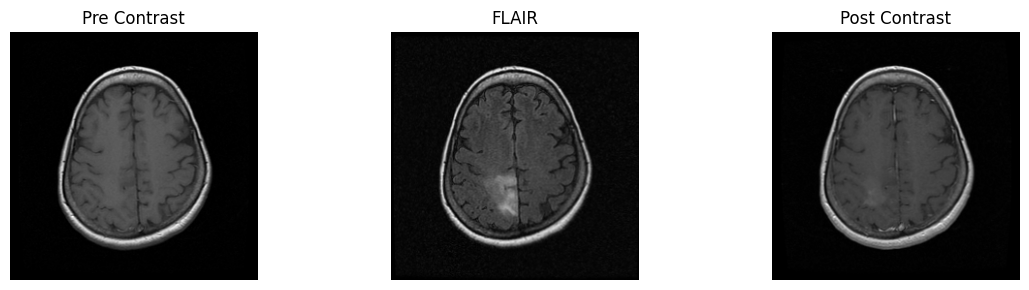

In [ ]:
train_dataset = TumorClassification(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=train_subjects,
    transform=None
)
example_img, example_label = train_dataset[0]
print(example_img.shape)
print(example_label.shape)
print(torch.max(example_img))
print(torch.min(example_img))
print(example_label)
del train_dataset
plot_subject_data(example_img.numpy().transpose((1, 2, 0)), None, None)


## ResNet Model
Let's write code to make our ResNet Classification model

In [ ]:
class SkipBlock(nn.Module):
  """
  Skip connection block for the ResNet architecture.
  """
  def __init__(self, channels: int):
        super().__init__()
        self.conv_block = nn.Identity()
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the skip connection block.
    """
    return x

In [ ]:
class ConvBlock(nn.Module):
  """
  Convolution block for the ResNet architecture.
  """
  def __init__(self, in_channels: int, out_channels: int):
    super().__init__()
    self.conv_block = nn.Identity()
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the convolution block.
    """
    return x

In [ ]:
class ResNet(nn.Module):
  """
  ResNet architecture.
  """
  def __init__(self, in_channels: int, out_channels: int):
    super().__init__()
    self.res_blocks = nn.Sequential(
        nn.Identity()
    )
    self.output = nn.Identity()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the ResNet architecture.
    """
    # Apply ResNet blocks

    # global average pooling

    return x

Let's double check our model works

In [ ]:
X = torch.randn(1, 3, 256, 256)
model = ResNet(3, 1)
Y = model(X)
print(Y.shape)
del model

torch.Size([1, 1])


## Training the Classification Model
Let's write a function that will train the model and validate it after every epoch

In [ ]:
def run_classification_training(
  model,
  train_dataset,
  val_dataset,
  batch_size: int = 32,
  n_epochs: int = 50,
  lr: float = 1e-3,
  device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
  early_stopping_patience: int = -1):

  # We could write our training procedure manually and directly index the `Dataset` objects,
  # but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:

  train_loader = []
  val_loader = []

  # store metrics
  train_loss_history = []
  train_acc_history = []
  val_loss_history = []
  val_acc_history = []

  model = model.to(device)

  # Choose Adam as the optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  # Initialize early stopping
  best_val_loss = float('inf')
  patience_counter = 0
  best_model = None

  for epoch in range(n_epochs):
    # Some layers, such as Dropout, behave differently during training
    model.train()
    train_loss = []
    train_acc = []
    for batch_idx, (img, label) in enumerate(train_loader):
      # Put img and mask onto the device
      img = img.to(device)
      label = label.to(device)
      # Erase accumulated gradients

      # Forward pass

      # Calculate loss
      loss = 0.0
      # Backward pass

      # Weight update

      # Track Statistics across batches
      train_loss.append(0.0)
      train_acc.append(0.0)

    train_loss_history.append(0.0)
    train_acc_history.append(0.0)

    # Track loss each epoch
    print(f"Train Epoch {epoch + 1} Loss: {train_loss_history[epoch]} Accuracy: {train_acc_history[epoch]}")

    # Putting layers like Dropout into evaluation mode
    model.eval()

    val_loss = []
    val_acc = []

    # Turning off automatic differentiation
    with torch.no_grad():
      for data, target in val_loader:
        data = data.to(device)
        target = target.to(device)
        # Forward pass
        output = None

        # Track Statistics across batches
        val_loss.append(0.0)
        val_acc.append(0.0)

    val_loss_history.append(0.0)
    val_acc_history.append(0.0)
    print(f"Val Epoch {epoch + 1} Loss: {val_loss_history[epoch]} Accuracy: {val_acc_history[epoch]}")

    if early_stopping_patience > 0:
      # What happens if our model's val loss is better than the best val loss
      # Reset best_val_loss, patience_counter, and best_model
      # Else increment patience_counter and test if we've reached early_stopping_patience
      # If we have then stop training
      pass

  return best_model, train_loss_history, train_acc_history, val_loss_history, val_acc_history

Let's run training with 50 epochs, batch size of 32, learning rate of 1e-3, early stopping patience of 20, and some simple augmentations

In [ ]:
train_dataset = TumorClassification(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=train_subjects,
    transform=None
)

val_dataset = TumorClassification(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=val_subjects,
    transform=None
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device is {device}")
model = ResNet(3, 1)
trained_model, train_loss_history, train_acc_history, val_loss_history, val_acc_history = run_classification_training(model, train_dataset, val_dataset, device=device, n_epochs=50, lr=1e-3, early_stopping_patience=20)

torch.save(trained_model.cpu().state_dict(), "classification-best-model.pth")

Device is cuda
Train Epoch 1 Loss: 0.482700297778303 Accuracy: 0.7531960227272727
Val Epoch 1 Loss: 0.5505528915673494 Accuracy: 0.7096354179084301
Train Epoch 2 Loss: 0.43487936935641547 Accuracy: 0.7837357954545454
Val Epoch 2 Loss: 0.4763628840446472 Accuracy: 0.7584635429084301
Train Epoch 3 Loss: 0.427308832549236 Accuracy: 0.7791193181818182
Val Epoch 3 Loss: 0.6575497528538108 Accuracy: 0.677734375
Train Epoch 4 Loss: 0.4232869266786359 Accuracy: 0.78125
Val Epoch 4 Loss: 0.4704641178250313 Accuracy: 0.7526041679084301
Train Epoch 5 Loss: 0.407069458541545 Accuracy: 0.79296875
Val Epoch 5 Loss: 0.525531742721796 Accuracy: 0.7272135429084301
Train Epoch 6 Loss: 0.4123616074635224 Accuracy: 0.7894176136363636
Val Epoch 6 Loss: 0.505736606195569 Accuracy: 0.7584635429084301
Train Epoch 7 Loss: 0.4082543430003253 Accuracy: 0.8018465909090909
Val Epoch 7 Loss: 0.41675461549311876 Accuracy: 0.7936197929084301
Train Epoch 8 Loss: 0.3663665162907405 Accuracy: 0.8199573863636364
Val Epoc

Let's plot the training curves we get

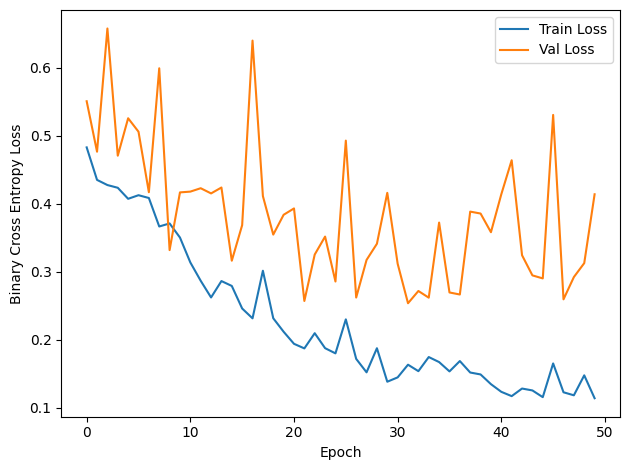

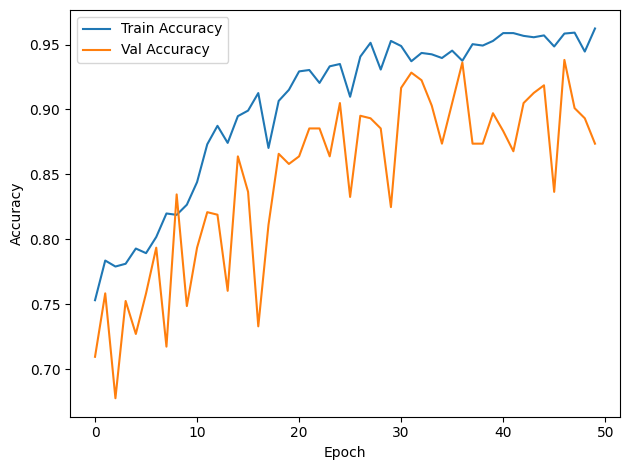

In [ ]:
plt.figure()
# Plot Code

plt.savefig("classification-loss.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

plt.figure()
# Plot Code

plt.savefig("classification-acc.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()


## Evaluation on Test Dataset

In [ ]:
def run_classification_testing(
  model,
  test_dataset,
  batch_size: int = 32,
  device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")):

  test_loader = None

  test_loss = []
  test_acc = []

  model = model.to(device)
  model = model.eval()

  outputs = []
  targets = []
  with torch.no_grad():
    for data, target in test_loader:
      data = data.to(device)
      target = target.to(device)
      # Forward pass
      output = None

      outputs.append(0.0)
      targets.append(0.0)

  return outputs, targets

Let's test the model

In [ ]:
test_dataset = TumorClassification(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=test_subjects,
    transform=None
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device is {device}")
outputs, targets = run_classification_testing(trained_model, test_dataset, device=device)

Let's calculate the ROC curve & AUROC and accuracy

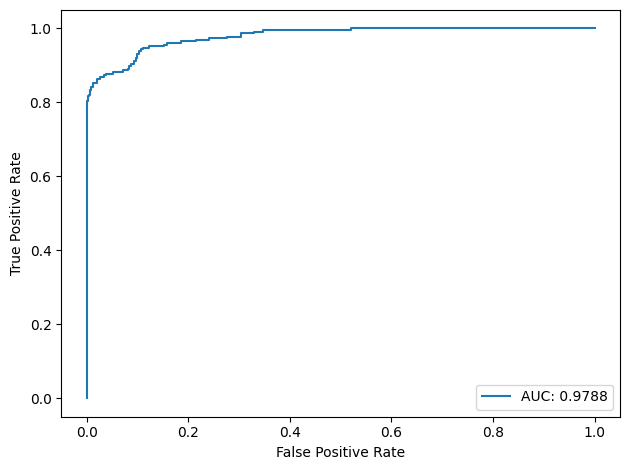

AUC: 0.9788042432040851
Accuracy: 0.9303030303030303


In [ ]:
from sklearn.metrics import roc_curve, auc
# Get fpr, tpr
# Get
fpr, tpr, _ = 0.0, 0.0, 0.0
roc_auc = 0.0
acc = 0.0

plt.figure()
# Plot Code

plt.savefig("classification-roc.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

print(f"AUC: {roc_auc}")
print(f"Accuracy: {acc}")

Let's calculate the PR curve & AUPR and compute the F1 score

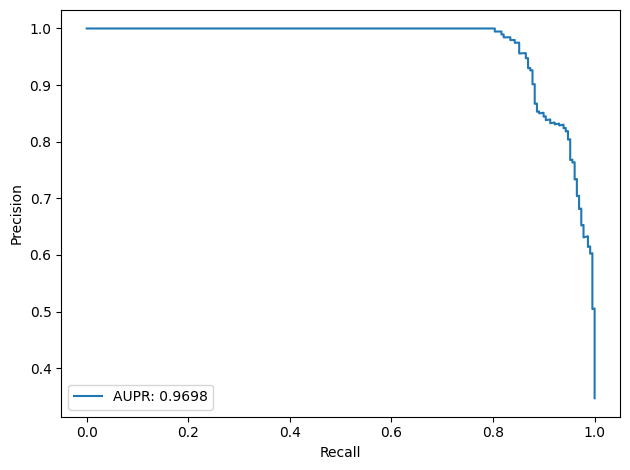

AUPR: 0.9697729062503896
F1 Score: 0.9090909090909091


In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = 0.0, 0.0, 0.0
pr_auc = 0.0
f1_score = 0.0

plt.figure()
# Plot Code

plt.savefig("classification-pr.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

print(f"AUPR: {pr_auc}")
print(f"F1 Score: {f1_score}")


Let's calculate the confusion matrix and compute the sensitivity and specificity

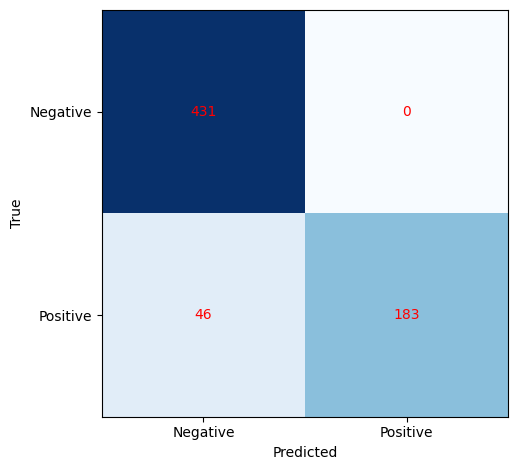

Sensitivity: 0.7991266375545851
Specificity: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
C = np.zeros((2, 2))

plt.figure()
# Plot Code
plt.savefig("classification-confusion-matrix.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

sensitivity = 0.0
specificity = 0.0

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

## Tumor Segmentation
Let's try to segment the tumor from the MRI images

In [ ]:
class TumorSegmentation(Dataset):
    def __init__(self, img_dir: str, subjects: List[str], transform=None):
        self.img_dir = img_dir
        self.subjects = subjects
        self.img_files, self.mask_files = [], []
        self.transform = transform

    def __len__(self):
        return 0.0

    def __getitem__(self, idx):
      # Get the image and mask data
      img = np.zeros((3, 256, 256))
      mask = np.zeros((1, 256, 256))
      # Apply the transform
      if self.transform:
        pass
      return torch.tensor(img.copy()).float(), torch.tensor(mask.copy()).float()

Let's test if the train dataset is working properly

torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
tensor(4.5630)
tensor(-0.6684)
tensor(1.)
tensor(0.)


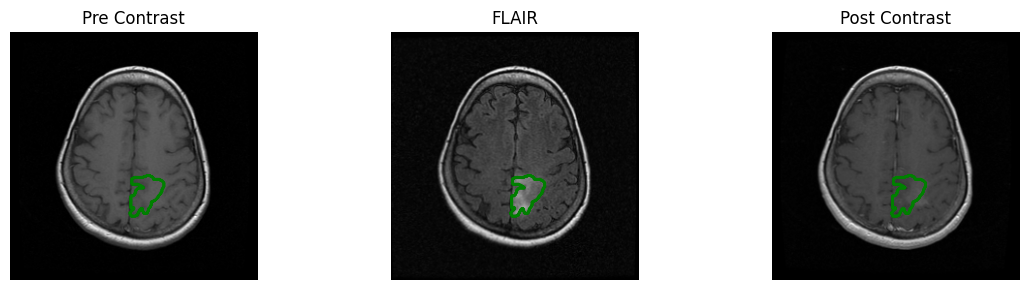

In [ ]:
train_dataset = TumorSegmentation(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=train_subjects,
    transform=Compose([
        RandFlip(),
        RandRotate(),
        Normalize(IMAGE_MEAN, IMAGE_STD),
    ])
)
example_img, example_mask = train_dataset[0]
print(example_img.shape)
print(example_mask.shape)
print(torch.max(example_img))
print(torch.min(example_img))
print(torch.max(example_mask))
print(torch.min(example_mask))
del train_dataset
plot_subject_data(example_img.numpy().transpose((1, 2, 0)), example_mask.numpy()[0])


## UNET Code
Let's write code for the UNET architecture

In [ ]:
class DoubleConvBlock(nn.Module):
  """
  Double convolution block for the UNET architecture.
  Conv2D -> BatchNorm2D -> ReLU -> Conv2D -> BatchNorm2D -> ReLU
  """
  def __init__(self,
               in_channels: int,
               out_channels: int):
      super().__init__()
      self.conv_block = nn.Identity()
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the double convolution block.
    """
    return x

In [ ]:
class UnetEncoderBlock(nn.Module):
  """
  Encoder block for the UNET architecture.
  DoubleConvBlock -> MaxPooling2D
  """
  def __init__(self,
                in_channels: int,
                out_channels: int):
      super().__init__()
      self.conv_block = nn.Identity()
      self.pool = nn.Identity()
  def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
    """
    Forward pass of the encoder block.
    Returns the output of the block and the output of the max pooling layer.
    """
    z = x
    output = x
    return z, output


In [ ]:
class UnetDecoderBlock(nn.Module):
  """
  Decoder block for the UNET architecture.
  ConvTranspose2D -> DoubleConvBlock
  """
  def __init__(self,
                in_channels: int,
                out_channels: int):
      super().__init__()
      self.upsample = nn.Identity()
      self.conv_block = nn.Identity()

  def forward(self, x: torch.Tensor, skip: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the decoder block.
    """
    return x



In [ ]:
class UNet(nn.Module):
  """
  UNET architecture.
  """
  def __init__(self,
               in_channels: int,
               out_channels: int):
      super().__init__()
      pass

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass of the UNET architecture.
    """
    return x

Check to see if model works

In [ ]:
X = torch.randn(1, 3, 256, 256)
model = UNet(3, 1)
Y = model(X)
print(Y.shape)
del model

torch.Size([1, 1, 256, 256])


## DICE Loss
This code implements the DICE loss

In [ ]:
def dice_score_fn(pred: torch.Tensor, target: torch.Tensor, smooth: float = 1.0) -> torch.Tensor:
    """
    Computes the mean DICE Score for a batch of predictions and targets.
    """
    intersection = 0.0
    union = 0.0
    dice = 0.0
    return 0.0

In [ ]:
def dice_loss_fn(pred: torch.Tensor, target: torch.Tensor, smooth: float = 1.0) -> torch.Tensor:
    """
    Computes the mean DICE Loss for a batch of predictions and targets.
    """
    return 1.0

In [ ]:
def dice_score_eval(pred: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
    """
    Computes the mean DICE Score for a batch of predictions and targets.
    Account for the situation where the target and pred are empty.
    """
    intersection = 0.0
    union = 0.0
    dice = 0.0
    return 0.0

## Training and validation

Now let's try to train the Unet model

In [ ]:
def run_training_loop(
    model,
    train_dataset,
    val_dataset,
    batch_size: int = 32,
    n_epochs: int = 50,
    lr: float = 1e-3,
    device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    early_stopping_patience: int = -1):
    """
    Trains a model on the given dataset.
    """

    # We could write our training procedure manually and directly index the `Dataset` objects,
    # but the `DataLoader` object conveniently creates an iterable for automatically creating random minibatches:
    train_loader = []
    val_loader = []

    # store metrics
    train_loss_history = []
    train_dice_history = []
    val_loss_history = []
    val_dice_history = []

    # put model on device
    model = model.to(device)

    # Choose Adam as the optimizer
    optimizer = None

    # Initialize early stopping
    best_val_loss = float('inf')
    patience_counter = 0
    best_model = None

    for epoch in range(n_epochs):
        # Some layers, such as Dropout, behave differently during training
        model.train()
        train_loss = []
        train_dice = []
        for batch_idx, (img, mask) in enumerate(train_loader):
            # Put img and mask onto the device
            img = img.to(device)
            mask = mask.to(device)
            # Erase accumulated gradients

            # Forward pass
            output = None

            # Calculate loss (BCE + 1e-2 * DICE_LOSS)
            loss = 0.0
            # Backward pass

            # Weight update

            # Track Statistics across bacthes
            train_loss.append(loss)
            train_dice.append(1.0)

        train_loss_history.append(0.0)
        train_dice_history.append(1.0)

        # Track loss each epoch
        print(f"Train Epoch {epoch + 1} Loss: {train_loss_history[epoch]} Dice Score: {train_dice_history[epoch]}")

        # Putting layers like Dropout into evaluation mode
        model.eval()

        val_loss = []
        val_score = []

        # Turning off automatic differentiation
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                target = target.to(device)
                output = None

                loss = 0.0
                val_loss.append(loss)
                val_score.append(1.0)

        val_loss_history.append(0.0)
        val_dice_history.append(1.0)
        print(f"Val Epoch {epoch + 1} Loss: {val_loss_history[epoch]} Dice Score: {val_dice_history[epoch]}")

        if early_stopping_patience > 0:
          pass
          # Implement the same early stopping function based on the val_loss

    return best_model, train_loss_history, train_dice_history, val_loss_history, val_dice_history

Now we apply the training loop

In [ ]:
train_dataset = TumorSegmentation(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=train_subjects,
    transform=None
)

val_dataset = TumorSegmentation(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=val_subjects,
    transform=None
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device is {device}")
model = UNet(3, 1)
trained_model, train_loss_history, train_dice_history, val_loss_history, val_dice_history = run_training_loop(model, train_dataset, val_dataset, device=device, n_epochs=50, lr=1e-3, early_stopping_patience=20)

torch.save(trained_model.cpu().state_dict(), "segmentation-best-model.pth")

Device is cuda
Train Epoch 1 Loss: 0.4308246729726141 Dice Score: 0.2526049098437811
Val Epoch 1 Loss: 0.38454618491232395 Dice Score: 0.6100260429084301
Train Epoch 2 Loss: 0.3537838811224157 Dice Score: 0.6189630681818182
Val Epoch 2 Loss: 0.3371072206646204 Dice Score: 0.6256510429084301
Train Epoch 3 Loss: 0.30807409570975736 Dice Score: 0.6583806818181818
Val Epoch 3 Loss: 0.29861681908369064 Dice Score: 0.606770833954215
Train Epoch 4 Loss: 0.2668358060446652 Dice Score: 0.6583806818181818
Val Epoch 4 Loss: 0.2515875194221735 Dice Score: 0.587890625
Train Epoch 5 Loss: 0.22856252030892807 Dice Score: 0.6583806818181818
Val Epoch 5 Loss: 0.21913469955325127 Dice Score: 0.6256510429084301
Train Epoch 6 Loss: 0.19517690129578114 Dice Score: 0.6583806818181818
Val Epoch 6 Loss: 0.1900785444304347 Dice Score: 0.6256510429084301
Train Epoch 7 Loss: 0.16736542196436363 Dice Score: 0.6583806818181818
Val Epoch 7 Loss: 0.15253454633057117 Dice Score: 0.606770833954215
Train Epoch 8 Loss: 

Let's plot our training curve

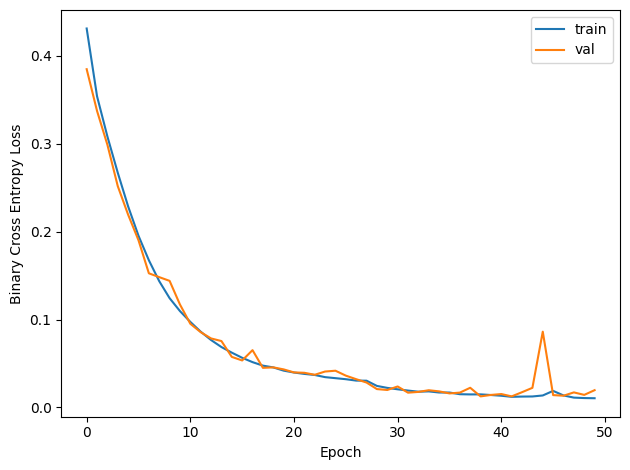

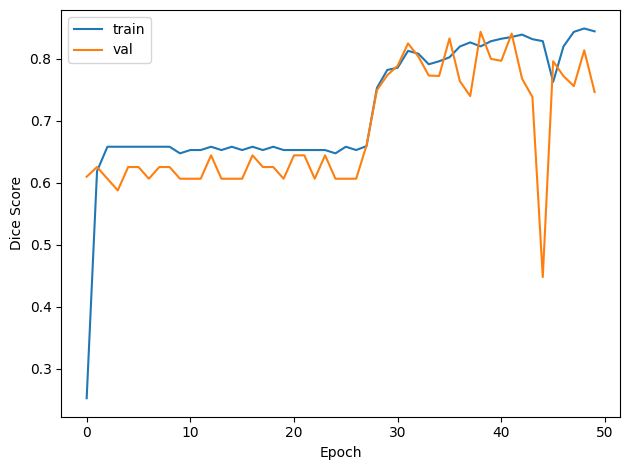

In [ ]:
plt.figure()
# Plot Code
plt.savefig("segmentation-loss.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

plt.figure()
# Plot Code
plt.savefig("segmentation-dice.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()

Let's test the model on the test set

In [ ]:
def run_testing_loop(
    model,
    test_dataset,
    batch_size: int = 32,
    device: torch.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")):

    test_loader = []

    model = model.to(device)
    model = model.eval()

    dice_score = []

    images = []
    outputs = []
    targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device)
            target = target.to(device)
            # Forward Pass
            output = None

            dice_score.append(1.0)
            images.append(np.zeros((3, 256, 256)))
            outputs.append(np.zeros((1, 256, 256)))
            targets.append(np.zeros((1, 256, 256)))
    dice_score = 1.0
    return dice_score, np.concatenate(outputs), np.concatenate(targets), np.concatenate(images)


Let's calulcate the DICE score

In [ ]:
test_dataset = TumorSegmentation(
    img_dir="lgg-mri-segmentation/kaggle_3m",
    subjects=test_subjects,
    transform=None
)

dice_score, outputs, targets, images = run_testing_loop(trained_model, test_dataset, device=device)
print(f"DICE Score: {dice_score}")


DICE Score: 0.7869678016864892


Let's plot some segmentation examples

367


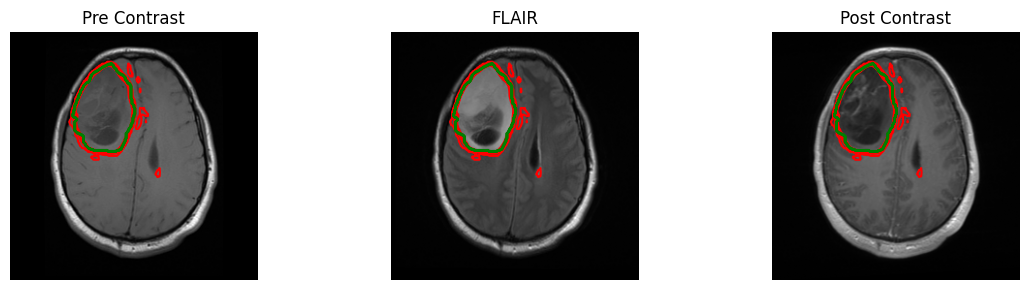

<Figure size 640x480 with 0 Axes>

In [ ]:
# Use your plot_subject_data function
# Find an example which has a high dice and plot it
idx = 0.0
print(idx)

plot_subject_data(images[idx, : :, :].transpose(1, 2, 0), targets[idx, 0, :, :], outputs[idx, 0, :, :])
plt.savefig("segmentation-good-example.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()


1


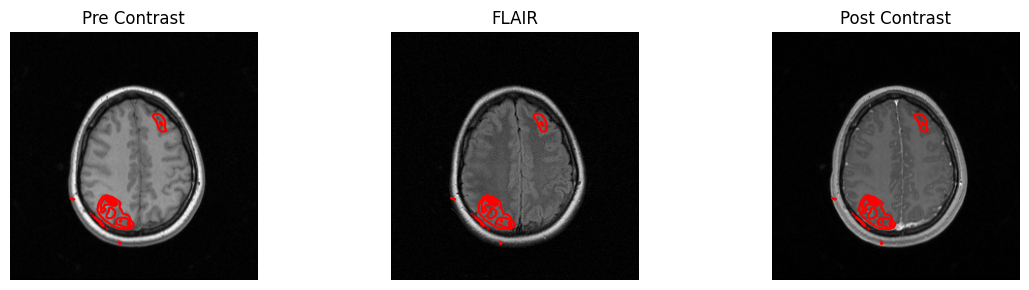

<Figure size 640x480 with 0 Axes>

In [ ]:
idx = 1.0
print(idx)

plot_subject_data(images[idx, : :, :].transpose(1, 2, 0), targets[idx, 0, :, :], outputs[idx, 0, :, :])
plt.savefig("segmentation-bad-example.png", bbox_inches='tight', pad_inches=0.05, dpi=600)
plt.show()
plt.close()
